#  Import the required libraries

In [31]:
import numpy as np
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#----------------------------------------------------------------------------------



- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain,Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = ###showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

# Reading the csv file

In [32]:
df=pd.read_csv("heart.csv")

# Data Visualization and Exploration

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
df.shape

(303, 14)

In [36]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [37]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [39]:
# Dropping duplicate recrods from the dataframe
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(302, 14)

In [41]:
# Finding categorical and numerical fetaures in dataframe
numericaldata = df.select_dtypes(include=['number']).columns
categoricaldata = df.select_dtypes(include=['object']).columns

In [42]:
numericaldata

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
categoricaldata

Index([], dtype='object')

In [44]:
# Finding unique values for each feature
#for i in df.columns:
#    print('\n\n',i)
#    print(df[i].unique())
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDE5D939C8>,
      dtype=object)

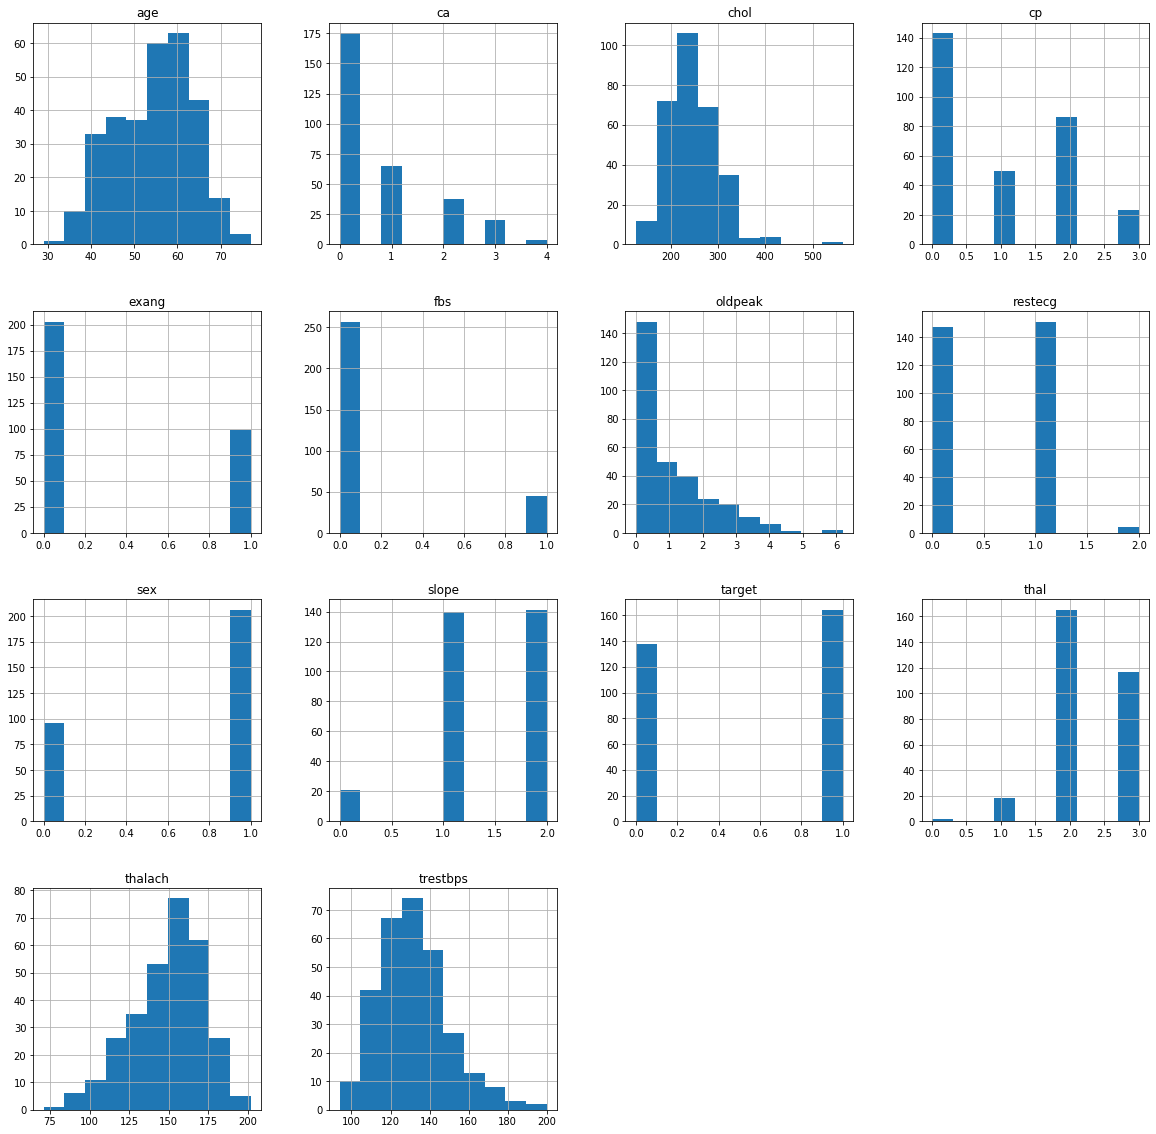

In [45]:
# Histogram/Distribution of data for each feature
df.hist(figsize=(20,20))

Text(0.5, 1.0, 'Age')

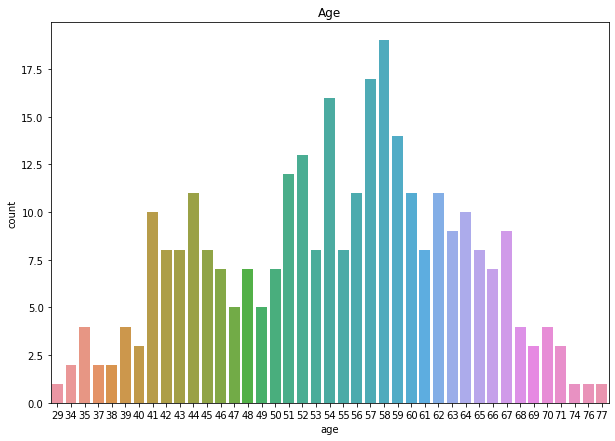

In [46]:
#Distribution based on age
plt.subplots(figsize=(10, 7))
sns.countplot(x='age',data=df);
plt.title('Age')

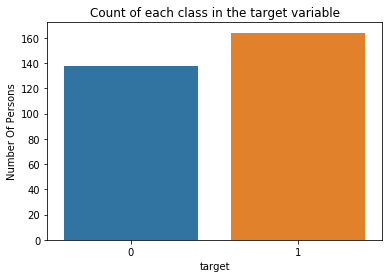

In [47]:
# Number of people having heart disease vs not having heart disease
sns.countplot(data=df, x='target')
plt.title("Count of each class in the target variable")
plt.ylabel("Number Of Persons")
plt.show()

Text(0, 0.5, 'Number Of Persons')

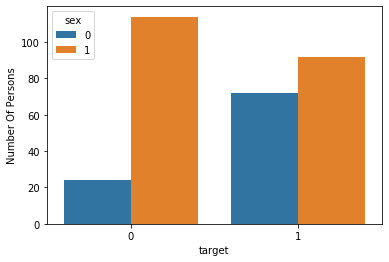

In [48]:
# Number of people having heart disease vs not having heart disease based on the gender
sns.countplot(x=df['target'],hue='sex',data=df)
plt.ylabel("Number Of Persons")

In [49]:
# Printing min, max and avg age in the data frame
print("Max age is",df['age'].max())
print("Min age is",df['age'].min())
print("Avg age is",df['age'].mean())


Max age is 77
Min age is 29
Avg age is 54.420529801324506


Text(0, 0.5, 'Number Of Persons')

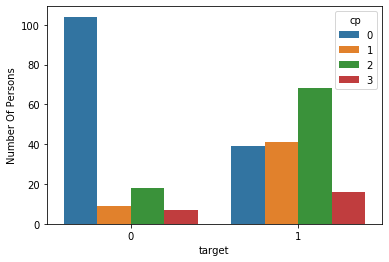

In [50]:
# Number of people having heart disease vs not having heart disease based on chest pain
sns.countplot(x=df['target'],hue='cp',data=df)
plt.ylabel("Number Of Persons")

In [51]:
# Printing min, max and avg heart rate reached
print("Max age is",df['thalach'].max())
print("Min age is",df['thalach'].min())
print("Avg age is",df['thalach'].mean())

Max age is 202
Min age is 71
Avg age is 149.56953642384107


Text(0, 0.5, 'Number Of Persons')

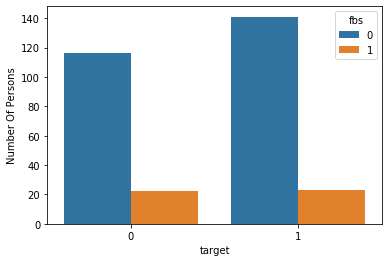

In [52]:
# Number of people having heart disease vs not having heart disease based on fasting blood sugar
# We have significant no. of people having heart disease who does not have heart disease 
sns.countplot(x=df['target'],hue='fbs',data=df)
plt.ylabel("Number Of Persons")

Text(0, 0.5, 'Number Of Persons')

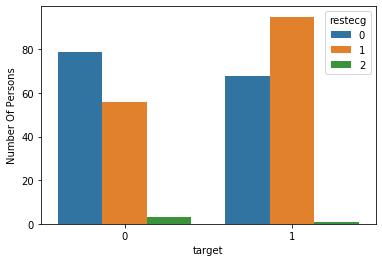

In [53]:
# Number of people having heart disease vs not having heart disease based on resting electrocardiographic
sns.countplot(x=df['target'],hue='restecg',data=df)
plt.ylabel("Number Of Persons")

Text(0, 0.5, 'Number Of Persons')

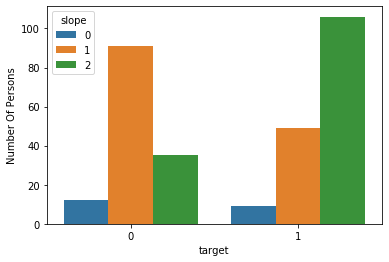

In [54]:
# Plot of fbs with respect to target variable
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# Downsloping is positively correlated with heart disease
sns.countplot(x=df['target'],hue='slope',data=df)
plt.ylabel("Number Of Persons")

In [55]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [56]:
#sns.boxplot?

### Checking for outliers

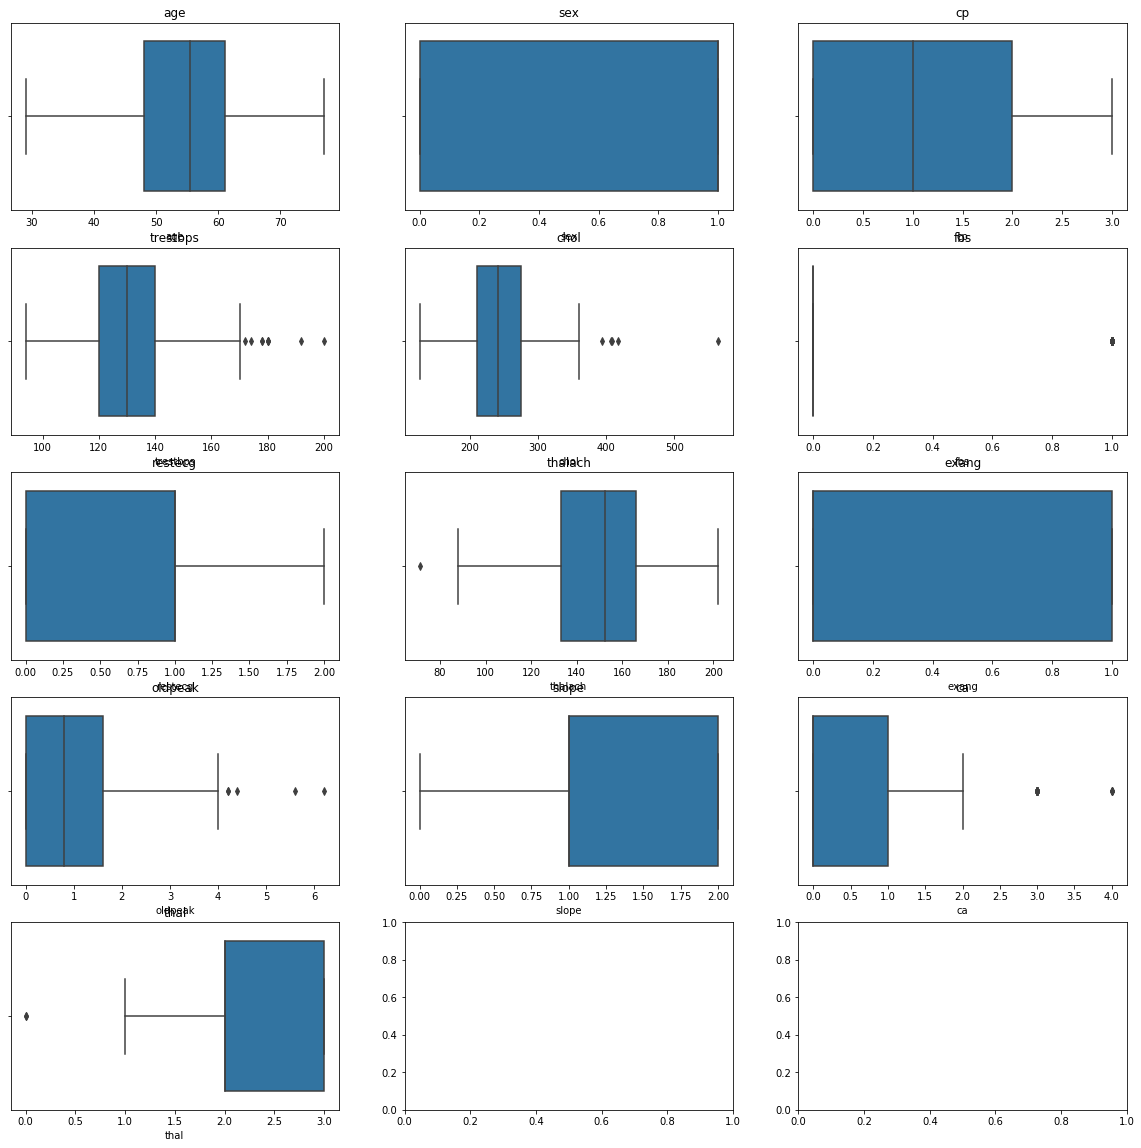

In [82]:
fig, axes = plt.subplots(5, 3,figsize=(20,20))
features=[['age','sex','cp'],
          ['trestbps','chol','fbs'],
          ['restecg','thalach','exang'],
          ['oldpeak','slope','ca'],
          ['thal'],
         ]

#print(features[0][0])

for i in range(0,5):
    for j in range (3):
        if i==4 and j==1:
            break
        sns.boxplot(ax=axes[i][j], data=df,x=features[i][j]).set_title(features[i][j])

#sns.boxplot(ax=axes[0][0], data=df,x='age').set_title("age")
#sns.boxplot(ax=axes[0][1], data=df,x='sex').set_title("sex")
#sns.boxplot(ax=axes[0][2], data=df,x='cp').set_title("cp")
#sns.boxplot(ax=axes[1][0], data=df,x='trestbps',showfliers=True).set_title("trestbps")
#sns.boxplot(ax=axes[1][1], data=df,x='chol').set_title("chol")
#sns.boxplot(ax=axes[1][2], data=df,x='fbs').set_title("fbs")
#sns.boxplot(ax=axes[2][0], data=df,x='restecg').set_title("restecg")
#sns.boxplot(ax=axes[2][1], data=df,x='thalach').set_title("thalach")
#sns.boxplot(ax=axes[2][2], data=df,x='exang').set_title("exang")
#sns.boxplot(ax=axes[3][0], data=df,x='oldpeak').set_title("oldpeak")
#sns.boxplot(ax=axes[3][1], data=df,x='slope').set_title("slope")
#sns.boxplot(ax=axes[3][2], data=df,x='ca').set_title("ca")
#sns.boxplot(ax=axes[4][0], data=df,x='thal').set_title("thal")

In [80]:
aoc_df.shape

(282, 14)

In [59]:
# Dropping the outliers
aoc_df=df
aoc_df = aoc_df[aoc_df.trestbps <171]
aoc_df = aoc_df[aoc_df.chol <361]
aoc_df = aoc_df[aoc_df.thalach >80]
aoc_df = aoc_df[aoc_df.oldpeak <4]

### Plotting boxplot after removing outliers

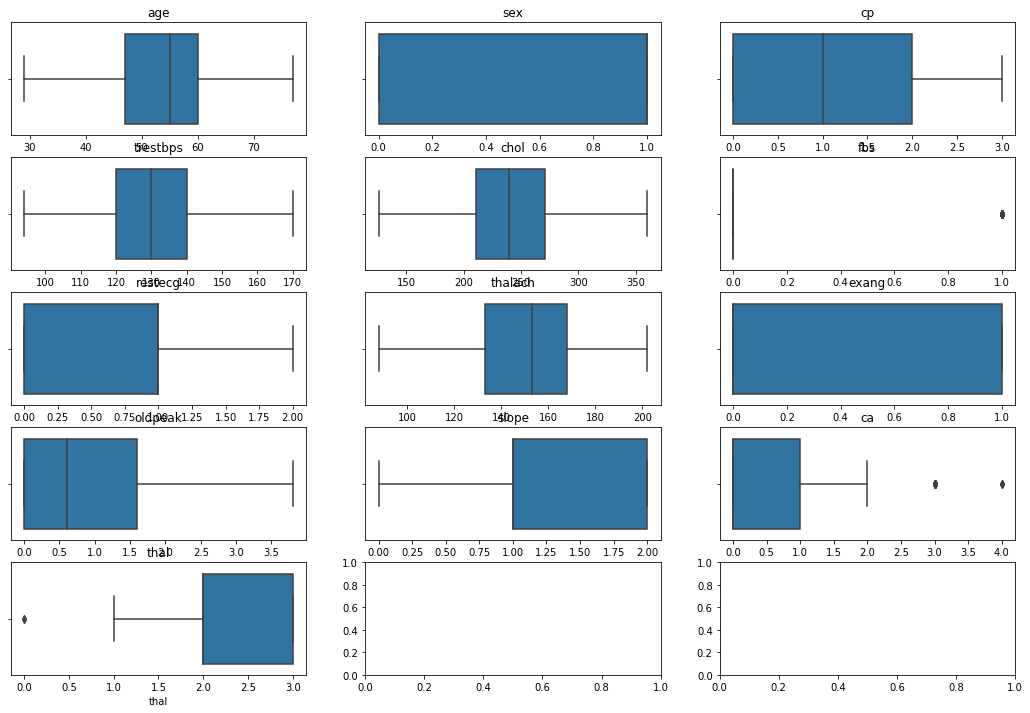

In [88]:
fig, axes = plt.subplots(5, 3,figsize=(18,12))

#sns.boxplot(ax=axes[0][0], data=df,x='age').set_title("age")
#sns.boxplot(ax=axes[0][1], data=df,x='sex').set_title("sex")
#sns.boxplot(ax=axes[0][2], data=df,x='cp').set_title("cp")

features=[['age','sex','cp'],
          ['trestbps','chol','fbs'],
          ['restecg','thalach','exang'],
          ['oldpeak','slope','ca'],
          ['thal'],
         ]
#print(features[0][0])

for i in range(0,5):
    for j in range (3):
        if i==4 and j==1:
            break
        sns.boxplot(ax=axes[i][j], data=aoc_df,x=features[i][j]).set_title(features[i][j])
        
        
        
#sns.boxplot(ax=axes[1][0], data=aoc_df,x='trestbps').set_title("trestbps")
#sns.boxplot(ax=axes[1][1], data=aoc_df,x='chol').set_title("chol")
#sns.boxplot(ax=axes[1][2], data=aoc_df,x='fbs').set_title("fbs")
#sns.boxplot(ax=axes[2][0], data=aoc_df,x='restecg').set_title("restecg")
#sns.boxplot(ax=axes[2][1], data=aoc_df,x='thalach').set_title("thalach")
#sns.boxplot(ax=axes[2][2], data=aoc_df,x='exang').set_title("exang")
#sns.boxplot(ax=axes[3][0], data=aoc_df,x='oldpeak').set_title("oldpeak")
#sns.boxplot(ax=axes[3][1], data=aoc_df,x='slope').set_title("slope")
#sns.boxplot(ax=axes[3][2], data=aoc_df,x='ca').set_title("ca")
#sns.boxplot(ax=axes[4][0], data=aoc_df,x='thal').set_title("thal")

In [89]:
#Creating a copy of the existing dataframe
new_df=aoc_df

In [90]:
new_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [91]:
#Dataframe shape after dropping few of the outliers
new_df.shape

(282, 14)

In [92]:
new_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


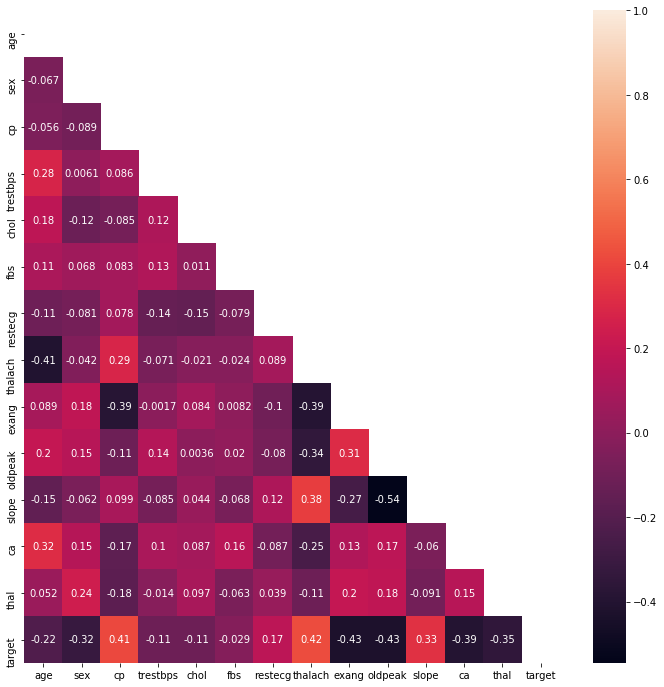

In [93]:
corr=new_df.corr()
plt.figure(figsize=(12,12))
matrix = np.triu(corr)
corr_heatmap = sns.heatmap(corr,annot=True,mask=matrix)
plt.show()